In [46]:
#!/bin/python3
import numpy as np
import matplotlib.pyplot as plt

### Inputs, required arrays:

NUM_OF_PTCS = 64                                 #number of particles
NUM_OF_CELLS_BY_DIM_X = 9                        #number of particles
NUM_OF_CELLS_BY_DIM_Y = 9                        #number of particles
h = 1                                            #search radius (and cell size)

ptcs = np.arange(0, NUM_OF_PTCS, dtype=np.int32) #particle index
cptcs = np.zeros(NUM_OF_PTCS)                    #cell particle index (to which cell particle belongs)
xptcs = 1 + np.random.rand(NUM_OF_PTCS)*7        #particle x-coordinates
yptcs = 1 + np.random.rand(NUM_OF_PTCS)*7        #particle y-coordinates

In [47]:
### - Create GRID, generate cell index:
# Grid that covers particle domain is generated, for each cell is computed cell index based
# on cell coordinates. In the same way, cell index is computed for each particle (particles are
# assigned to cells).

# The simplest way how to obtain cell index is based on indexing. In second example Morton Z-order 
# curve is used.

cidx = np.zeros((NUM_OF_CELLS_BY_DIM_X, NUM_OF_CELLS_BY_DIM_Y))

for x in range(NUM_OF_CELLS_BY_DIM_X):
    for y in range(NUM_OF_CELLS_BY_DIM_Y):
        cidx[x,y] = x+y*NUM_OF_CELLS_BY_DIM_X
        
# Computation of cell index for particles
for i in range(len(ptcs)):
        cptcs[i] = np.floor(xptcs[i]) + np.floor(yptcs[i])*NUM_OF_CELLS_BY_DIM_X

print("Map of cell indices in 2D:\n", np.rot90(cidx))
        
print("\nParticle index:\n", ptcs)
print("Particle cell index:\n", cptcs)

Map of cell indices in 2D:
 [[72. 73. 74. 75. 76. 77. 78. 79. 80.]
 [63. 64. 65. 66. 67. 68. 69. 70. 71.]
 [54. 55. 56. 57. 58. 59. 60. 61. 62.]
 [45. 46. 47. 48. 49. 50. 51. 52. 53.]
 [36. 37. 38. 39. 40. 41. 42. 43. 44.]
 [27. 28. 29. 30. 31. 32. 33. 34. 35.]
 [18. 19. 20. 21. 22. 23. 24. 25. 26.]
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.]]

Particle index:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Particle cell index:
 [23. 40. 21. 40. 39. 21. 65. 51. 39. 11. 70. 60. 56. 11. 69. 23. 67. 56.
 32. 12. 10. 10. 31. 15. 56. 64. 50. 43. 24. 41. 25. 16. 12. 39. 46. 13.
 60. 42. 70. 33. 43. 46. 11. 50. 38. 25. 30. 66. 59. 47. 23. 33. 14. 70.
 11. 12. 41. 66. 50. 52. 25. 31. 51. 15.]


In [48]:
# Then, the particles are sorted by its cell index, so they are stored in memory as the grid 
# indices goes.

cptcs_s, xptcs_s, yptcs_s = zip(*sorted(zip(cptcs, xptcs, yptcs)))
cptcs = np.array(cptcs_s,  dtype=np.int32 ); xptcs = np.array(xptcs_s); yptcs = np.array(yptcs_s)

print("Particle index (sorted):\n", ptcs)
print("particle cell index:\n", cptcs)

Particle index (sorted):
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
particle cell index:
 [10 10 11 11 11 11 12 12 12 13 14 15 15 16 21 21 23 23 23 24 25 25 25 30
 31 31 32 33 33 38 39 39 39 40 40 41 41 42 43 43 46 46 47 50 50 50 51 51
 52 56 56 56 59 60 60 64 65 66 66 67 69 70 70 70]


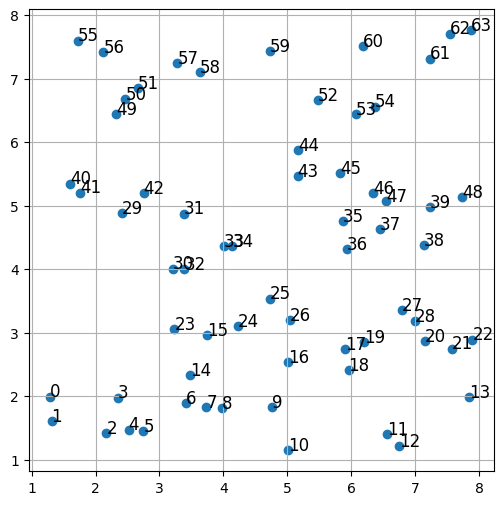

In [49]:
### Visualise the particle and grid

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(xptcs, yptcs)
plt.xlim = (0,8); plt.ylim = (0,9)
plt.grid()

for i, txt in enumerate(ptcs):
    ax.annotate(txt, (xptcs[i], yptcs[i]), fontsize=12)

In [50]:
### Do slight perturbation, move some particles to neighbor cells and recompute cell indices
ptcsToMove = [ 12, 13, 18, 18 , 25, 26, 28, 29, 32, 33, 37, 39, 42, 45, 47,49, 52, 30, 61 ]

for p in ptcsToMove:
    randomMove = np.random.rand(); xRandomMove = np.random.rand(); yRandomMove = np.random.rand()
    if randomMove < 0.5:
        if xRandomMove > 0.5:
            xptcs[p] += 1
        else:
            xptcs[p] -= 1
    else:
        if yRandomMove > 0.5:
            yptcs[p] += 1
        else:
            yptcs[p] -= 1
            
print("Particle index (sorted):\n", ptcs)
print("particle cell index:\n", cptcs)
            
# Computation of cell index for particles
for i in range(len(ptcs)):
        cptcs[i] = np.floor(xptcs[i]) + np.floor(yptcs[i])*NUM_OF_CELLS_BY_DIM_X

print("particle cell index - shifted:\n", cptcs)

Particle index (sorted):
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
particle cell index:
 [10 10 11 11 11 11 12 12 12 13 14 15 15 16 21 21 23 23 23 24 25 25 25 30
 31 31 32 33 33 38 39 39 39 40 40 41 41 42 43 43 46 46 47 50 50 50 51 51
 52 56 56 56 59 60 60 64 65 66 66 67 69 70 70 70]
particle cell index - shifted:
 [10 10 11 11 11 11 12 12 12 13 14 15  6  7 21 21 23 23 23 24 25 25 25 30
 31 40 33 33 42 39 48 39 38 49 40 41 41 43 43 42 46 46 38 50 50 59 51 60
 52 47 56 56 50 60 60 64 65 66 66 67 69 71 70 70]
